In [63]:
using Plots
using StatsPlots
using Statistics
using LsqFit
using Distributions

# Zad 1

$Y_i=\beta x_i+\varepsilon_i$

## a)

$S(\beta)={\sum\limits_{i=1}^n \left(Y_i-\hat Y\right)^2}=\sum\limits_{i=1}^n (Y_i-\beta x_i)^2$

$\dfrac{\partial}{\partial\beta}S=2\sum\limits_{i=1}^n (Y_i-\beta x_i)x_i=0\iff\beta=\dfrac{
\sum\limits_{i=1}^n Y_ix_i}{\sum\limits_{i=1}^nx_i^2}$

## b)

$\mathbb{E}\hat\beta=\left(\sum\limits_{i=1}^n x_i^2\right)^{-1}\mathbb{E}\sum\limits_{i=1}^n Y_ix_i=\left(\sum\limits_{i=1}^n x_i^2\right)^{-1}\mathbb{E}\sum\limits_{i=1}^n (\beta x_i+\varepsilon)x_i=\left(\sum\limits_{i=1}^n x_i^2\right)^{-1}\mathbb{E}\beta\sum\limits_{i=1}^n x_i^2+\left(\sum\limits_{i=1}^n x_i^2\right)^{-1}\sum\limits_{i=1}^n x_i \mathbb{E} \varepsilon_i=\beta+\sum 0=\beta$

## c)

$\text{Var}\hat\beta=\left(\sum\limits_{i=1}^n x_i^2\right)^{-2}\text{Var}\left(\sum\limits_{i=1}^n x_i\varepsilon_i\right)=\left(\sum\limits_{i=1}^n x_i^2\right)^{-2}\sum\limits_{i=1}^n x_i^2\text{Var}\varepsilon_i=
\left(\sum\limits_{i=1}^n x_i^2\right)^{-1}\sigma^2$

## d)

$Y_i\sim\mathcal N\left(\beta x_i, \sigma^2\right)$

$f(\beta)=\prod f_{Y_i}(\beta)==\text{min}\iff\ln f==\text{min}$

$\ln f(\beta)=\sum (y_i-\beta x_i)^2\leftarrow$ było w a)

## e)

In [11]:
β=100rand()
σ²=10rand()

7.855880216223962

In [12]:
N=1e3
n=1e2
N=Int(N)
n=Int(n)
β,σ²,n

(95.31710319675514, 7.855880216223962, 100)

In [13]:
e=[sqrt.(-2log.(rand(n))).*sin.(2π .*rand(n)) for i in 1:N];

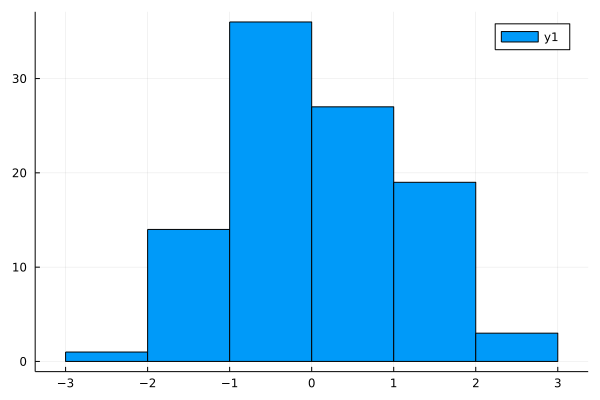

In [14]:
histogram(e[1])

In [15]:
x=LinRange(0,10,n)

100-element LinRange{Float64, Int64}:
 0.0,0.10101,0.20202,0.30303,0.40404,…,9.59596,9.69697,9.79798,9.89899,10.0

In [16]:
y=[β*x+e[i] for i in 1:N];

In [17]:
β′=[sum(y[i].*x)./sum(x.^2) for i in 1:N]

1000-element Vector{Float64}:
 95.32998407114688
 95.32390042858634
 95.31925342788364
 95.30903876744858
 95.32856353102001
 95.31021850089594
 95.29331654460454
 95.3028615472304
 95.3274666871334
 95.32269848547023
 95.27697635493465
 95.33334422560478
 95.3032327131681
  ⋮
 95.30828949603942
 95.31095293205051
 95.31064573447549
 95.31325340776206
 95.31798335812545
 95.33862131072331
 95.28301069713308
 95.35641172084048
 95.313800245902
 95.33021265369143
 95.30770737943253
 95.31431406467094

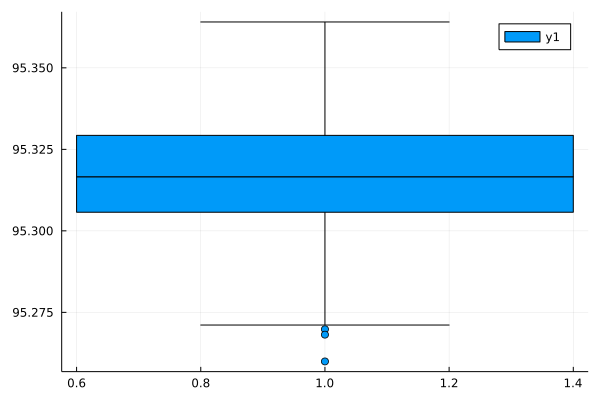

In [18]:
boxplot(β′)

# Zad 2

## wstep

In [2]:
σ=[1,3]
n=1e3
Y=[σ[Int(floor((2i-1)/n))+1]sqrt(-2log(rand()))*cos(2pi*rand()) for i in 1:n];
d(σ₁,σ₂,n)=begin
    n=Int(n)
    σ=[σ₁,σ₂]
    Y=[σ[Int(floor((2i-1)/n))+1]sqrt(-2log(rand()))*cos(2pi*rand()) for i in 1:n];
    C=cumsum(Y.^2)
    plot(scatter(Y),plot(C))
end

d (generic function with 1 method)

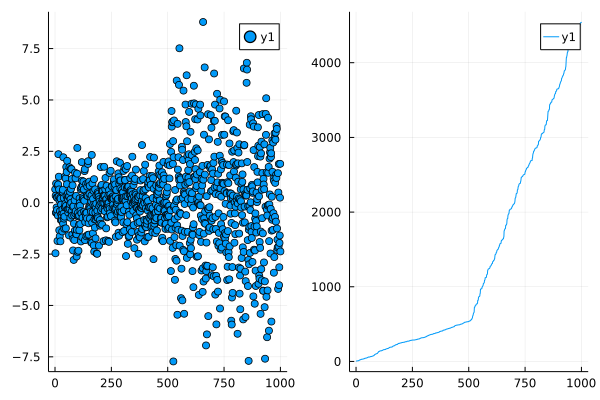

In [3]:
d(1,3,1e3)

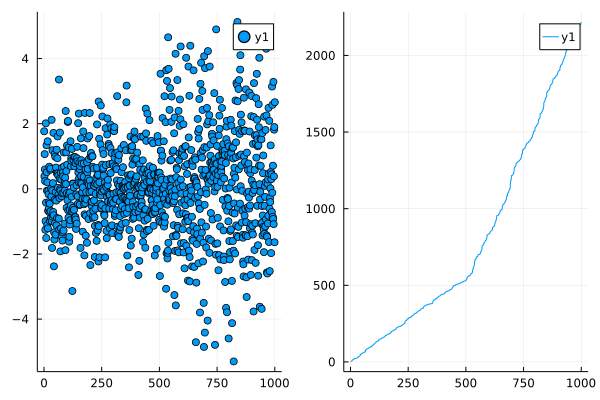

In [4]:
d(1,2,1e3)

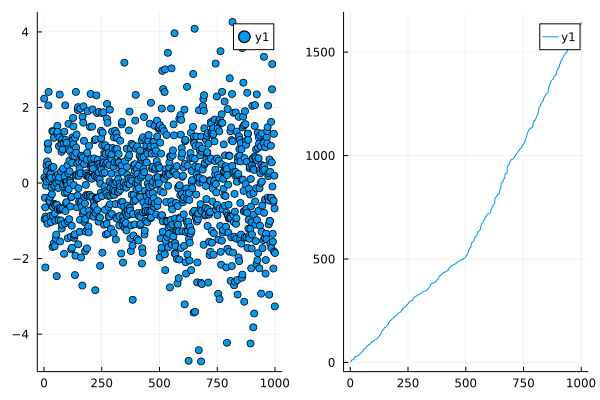

In [5]:
d(1,1.5,1e3)

## regime

In [99]:
σ=[1,3]
n=1e3
lₜ=500
#X=[σ[Int(i>lₜ) +1]sqrt(-2log(rand()))*cos(2pi*rand()) for i in 1:n];
X=[σ[Int(i>lₜ)+1]*sqrt(-2log(rand()))*cos(2pi*rand()) for i in 1:n];


In [116]:
regime(X)=begin
    c=1e6
    for k in 3:length(X)-3
        k=500
        #c=min(c,G(X,k))
        print(G(X,k))
        break
    end
    c
    
end

G(X,k)=begin
    g1=cumsum(X[1:k].^2)
    g2=cumsum(X[k+1:end].^2)
    show(plot(g2))
    # będzie polyfit    
    @. model(x, p) = p[1]*x
    fit1 = curve_fit(model, 1:k, g1, [1.0])
    fit2 = curve_fit(model, 1:length(g2), g2, [1.0])
    print(coef(fit1))
    return Β(k,coef(fit1)[1],coef(fit2)[1],g1,g2)
end

# duża beta
Β(k,β₁,β₂,g1,g2)=begin
    #g1=cumsum(X[1:k].^2)
    #g2=cumsum(X[k+1:end].^2)
    #C₁=cumsum(X[1:k].^2)
    sum((g1[j]-β₁*j)^2 for j in 1:k)+sum((g2[j]-j*β₂)^2 for j in 1:length(g1))
    plot(g2)
    plot!(x->x*β₂)
end


Β (generic function with 2 methods)

In [117]:
regime(X)

Plot{Plots.GRBackend() n=1}[0.9622976286771887]Plot{Plots.GRBackend() n=2}

1.0e6

Plot{Plots.GRBackend() n=1}[0.9557119993710408]

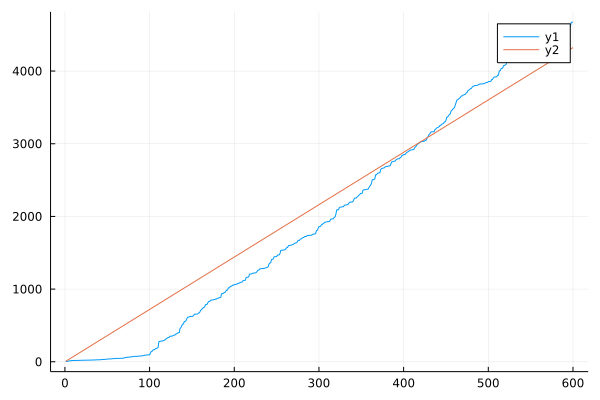

In [118]:
G(X,400)

# Zad 3

## a

In [2]:
β=3
n=Int(1e3)
X=0:10/(n-1):10
σ=1
M=Int(1e3)

1000

In [3]:
b(β,σ,n)=begin
    X=0:10/(n-1):10
    Y=X*β.+σ.*[sqrt(-2log(rand()))*cos(2pi*rand()) for i in 1:n];
    x=mean(X)
    y=mean(Y)
    sum((X.-x) .* (Y.-y))/sum( (X.-x).^2 )
end

b (generic function with 1 method)

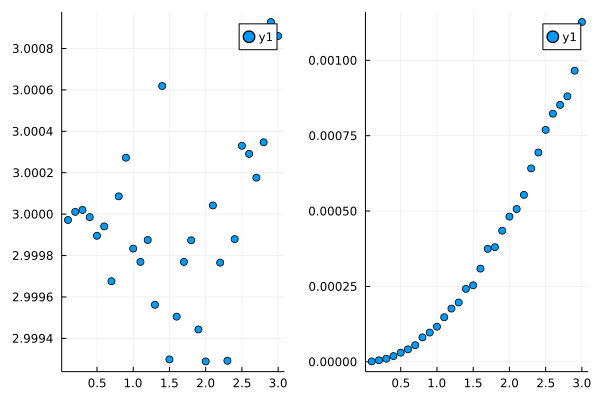

In [4]:
E=[]
V=[]
for σ in 0.1:0.1:3
    B=[b(β,σ,n) for i in 1:M];
    append!(E,mean(B))
    append!(V, var(B))
end
plot(scatter(0.1:0.1:3,E),scatter(0.1:0.1:3,V))

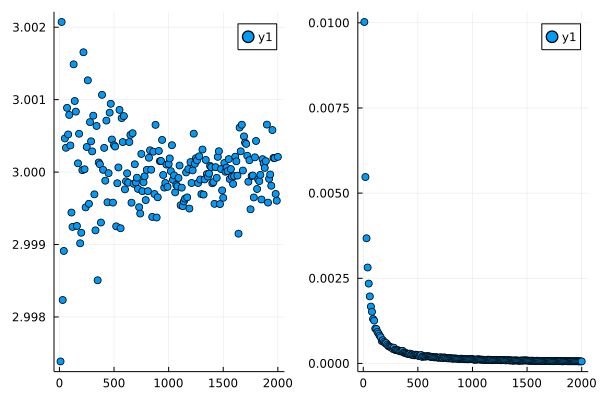

In [5]:
E=[]
V=[]
σ=1
for n in 10:10:2000
    B=[b(β,σ,n) for i in 1:M];
    append!(E,mean(B))
    append!(V, var(B))
end
plot(scatter(10:10:2000,E),scatter(10:10:2000,V))

## b

In [32]:
β₀=2
β₁=3
n=Int(1e3)
X=0:10/n:10
σ=1
M=Int(1e4);

In [33]:
μ=[β₀,β₁]
Σ=[sqrt(σ^2*(1/n+mean(X)^2/sum( (X.-mean(X)).^2 ))), sqrt(σ^2/sum( (X.-mean(X)).^2 ))]

2-element Vector{Float64}:
 0.06317452773937303
 0.010938045447140566

In [34]:
b(β₀,β₁,σ,n)=begin
    X=0:10/n:10
    Y=β₀.+X*β₁.+σ.*[sqrt(-2log(rand()))*cos(2pi*rand()) for i in 1:n+1];
    x=mean(X)
    y=mean(Y)
    β̂=sum((X.-x) .* Y)/sum( (X.-x).^2 )
    [β̂, y-β̂*x]
end

b (generic function with 2 methods)

In [35]:
B=b(β₀,β₁,σ,n)
for i in 2:M
    B=hcat(B,b(β₀,β₁,σ,n))
end

In [36]:
B

2×10000 Matrix{Float64}:
 2.9983   3.01261  2.99972  3.01111  …  3.0088   3.00371  3.01002  3.00934
 1.98847  1.94081  2.01648  1.97206     1.98789  1.99691  1.96917  1.97361

In [37]:
g(t,σ,μ)=1/(σ*√(2π))*exp(-1/2*((t-μ)/σ)^2)

g (generic function with 1 method)

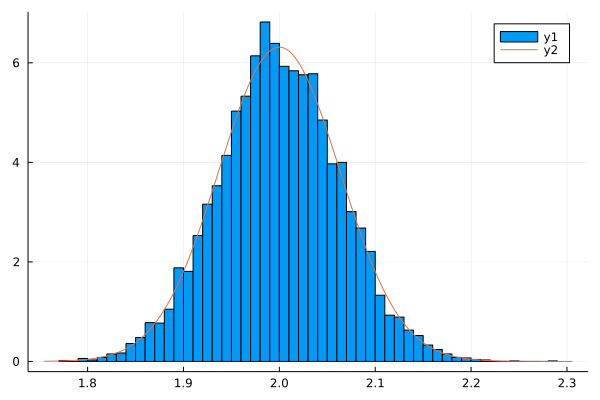

In [38]:
histogram(B[2,:], normed=true)
plot!(x->g(x,Σ[1],μ[1]))

In [39]:
g(x,σ,μ)=1/(σ*√(2π))*exp(-1/2*(x-μ)^2/σ^2)

g (generic function with 1 method)

In [40]:
sort!(B[1,:])
sort!(B[2,:]);

In [41]:
B0=sort(B[1,:]);
B1=sort(B[2,:]);

In [42]:
F(x,B)=begin
    i=1
    n=length(B)
    while i<=n && B[i]<x
        i*=100
    end
    i= i>=100 ? Int(i/100) : 1
    while i<=n && B[i]<x
        i*=10
    end
    i= i>=10 ? Int(i/10) : 1
    while i<=n && B[i]<x
        i+=1
    end
    (i-1)/length(B)
end
        

F (generic function with 1 method)

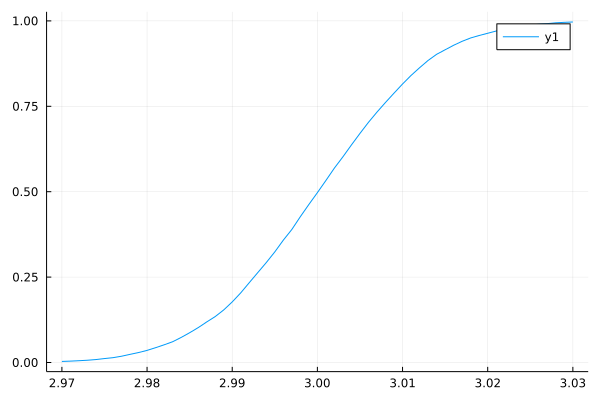

In [75]:
plot(x->F(x,B0),3-0.03:0.001:3+0.03)

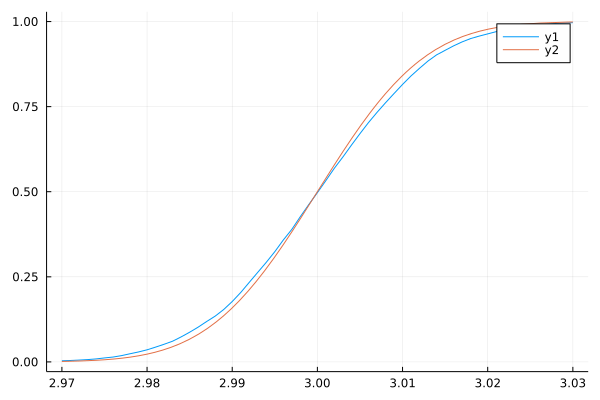

In [76]:
plot!(t->cdf(Normal(3,0.01),t))

# Zad 4

## a

In [44]:
σ=2rand()+1
n=50
M=1e5
β=70rand();
X=0:10/(n-1):10
σ,β

(2.6648070212591977, 13.391371106340161)

In [45]:
b(β,σ,n)=begin
    X=0:10/(n-1):10
    Y=X*β.+σ.*[sqrt(-2log(rand()))*cos(2pi*rand()) for i in 1:n];
    x=mean(X)
    y=mean(Y)
    sum((X.-x) .* (Y.-y))/sum( (X.-x).^2 )
end

b (generic function with 2 methods)

In [46]:
B=[b(β,σ,n) for i in 1:M];

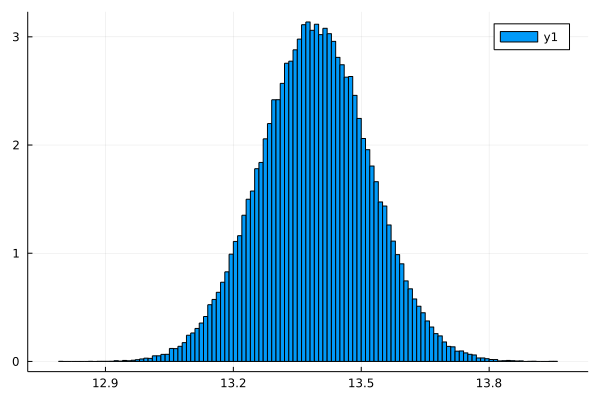

In [47]:
histogram(B, normed=true)

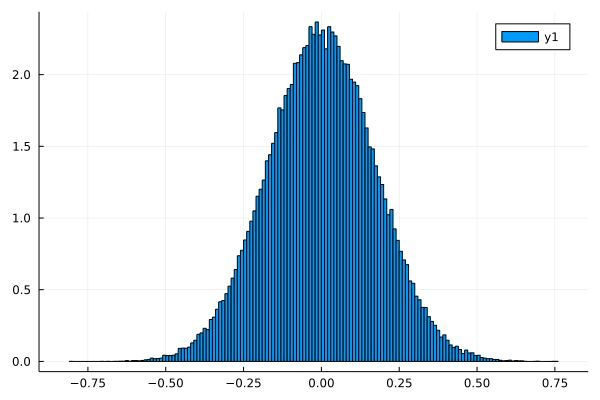

In [52]:
x=mean(X)
histogram((B.-β)./(σ*sqrt(1/n+x^2/sum((X.-x).^2))), normed=true)

In [49]:
f(x)=exp(-x^2/2)/√(2π)

f (generic function with 1 method)

## b

In [54]:
β₀=2
β₁=3
n=Int(1e3)
X=0:10/n:10
σ=1
M=Int(1e4);

In [55]:
b(β₀,β₁,σ,n)=begin
    X=0:10/n:10
    Y=β₀.+X*β₁.+σ.*[sqrt(-2log(rand()))*cos(2pi*rand()) for i in 1:n+1];
    x=mean(X)
    y=mean(Y)
    β̂=sum((X.-x) .* Y)/sum( (X.-x).^2 )
    s=1/(n-2)*sum( (Y.- (y.- β̂*x .+ β̂ .*X) ).^2 ) 
    [β̂, y-β̂*x, s]
end

b (generic function with 2 methods)

In [56]:
B=b(β₀,β₁,σ,n)
for i in 2:M
    B=hcat(B,b(β₀,β₁,σ,n))
end

In [57]:
B

3×10000 Matrix{Float64}:
 3.00092   3.01412  3.01295   3.00095  2.9856   …  3.01555  3.00162  3.01161
 1.92479   1.94566  1.91595   1.9431   2.05033     1.94973  1.95927  1.98609
 0.944086  1.02458  0.891441  1.06582  1.01505     1.01937  1.01583  0.942144

In [58]:
μ=[β₀,β₁]
sigma(s)=[sqrt(s^2*(1/n+mean(X)^2/sum( (X.-mean(X)).^2 ))), sqrt(s^2/sum( (X.-mean(X)).^2 ))]

sigma (generic function with 1 method)

In [98]:
A1= ( B[1,:].-β₁ )./ [sigma(B[1,i])[1] for i in 1:size(B)[2]]

10000-element Vector{Float64}:
  0.004829531623518689
  0.07415286727888072
  0.06804204967653338
  0.005001746637853072
 -0.07634414402321343
  0.10612721825405981
 -0.015692851253838607
  0.099478655827426
 -0.12126725659236084
  0.11567814126311073
 -0.05312331710590793
  0.11306054855539661
 -0.036307290776303854
  ⋮
  0.15403033400109475
  0.06843484095642692
 -0.022658570388430794
 -0.024636482469137366
 -0.052725946705143745
  0.03849199837495439
 -0.032157296292643744
 -0.0452748495627574
  0.029561090823972735
  0.08160103735554303
  0.00851869223302988
  0.061000313565494464

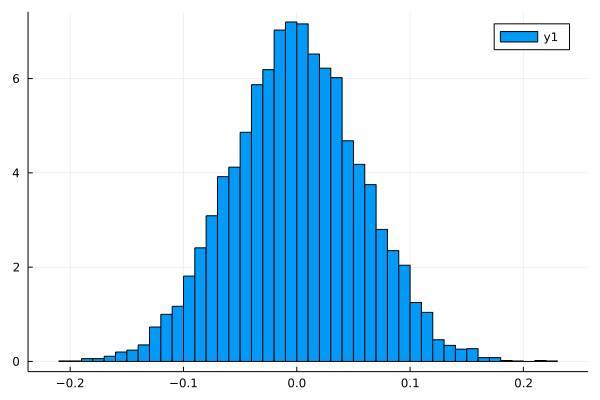

In [104]:
histogram(A1, normed=true)